In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from dateutil import parser

In [86]:
dataset = pd.read_csv('FineTech_appData.csv')

In [87]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [88]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
#data cleaning
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [90]:
dataset['hour'].head()

0     2
1     1
2    19
3    16
4    18
Name: hour, dtype: int64

In [91]:
#plotting

dataset2 = dataset.copy().drop(columns=['user', 'screen_list','first_open','enrolled_date','enrolled'])

In [92]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [93]:
dataset2.shape

(50000, 7)

In [94]:
dataset2.shape[0]

50000

In [95]:
dataset2.shape[1]

7

In [96]:
dataset2.columns.values

array(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked'], dtype=object)

In [97]:
np.size(dataset2.iloc[:, 1].unique())

24

In [98]:
#plt.gca()----> gca means "get current axes". "Current" here means that it provides a handle to the last active axes. If there is no axes yet, an axes will be created. If you create two subplots, the subplot that is created last is the current one.

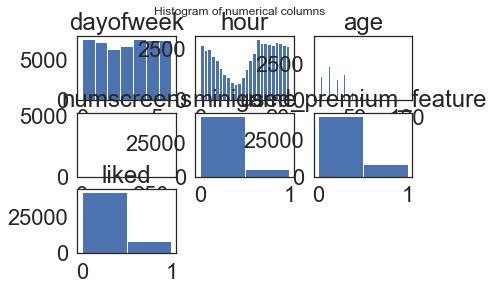

In [99]:
#plotting histogram for only numerical columns to understand the distribution of data
plt.suptitle('Histogram of numerical columns')
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    ax = plt.gca()
    ax.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    plt.hist(dataset2.iloc[:, i-1], bins=vals, color='b')
    
    

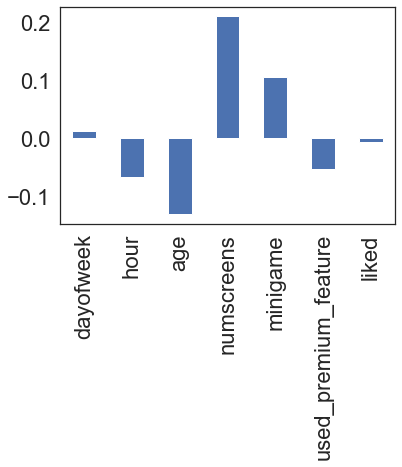

In [100]:
dataset2.corrwith(dataset.enrolled).plot.bar()

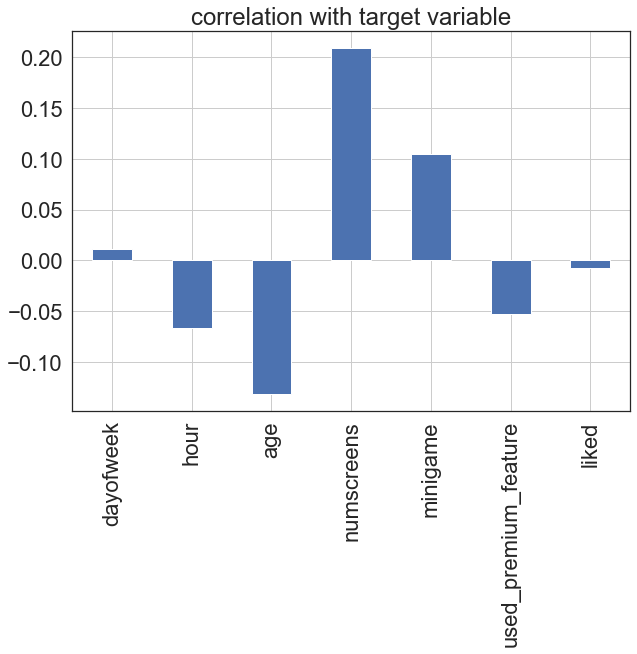

In [101]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(10,7), title='correlation with target variable', grid=True)

### correlation matrix code


In [102]:
#correlation
sns.set(style='white', font_scale=2)

In [103]:
#compute the correlation matrix
corr = dataset2.corr()
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [104]:
#generate mask for upper triangle

mask = np.zeros_like(corr, dtype=np.bool)

In [105]:
mask

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [106]:
mask[np.triu_indices_from(mask)] = True

In [107]:
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

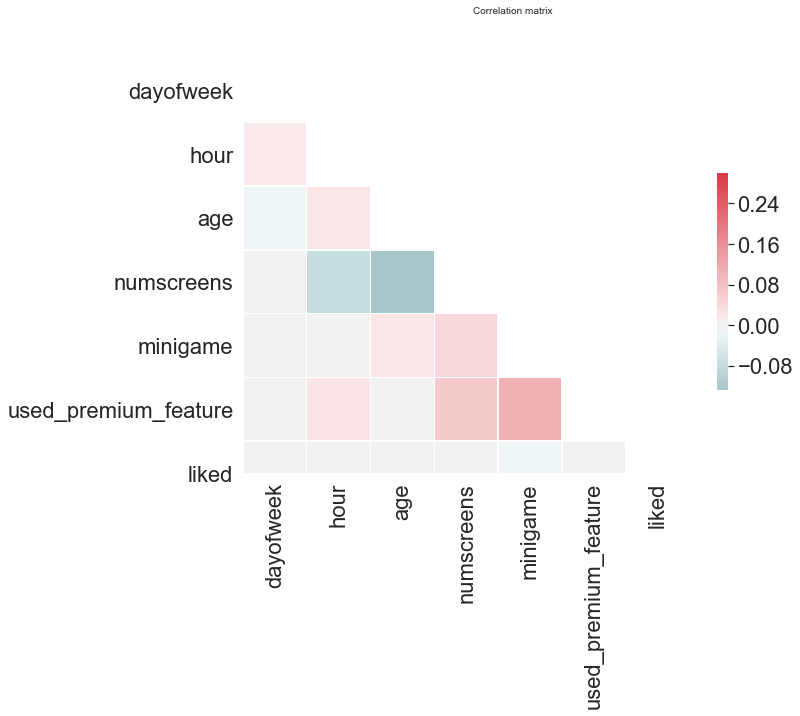

In [108]:
#setup matplotlib fig

fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle("Correlation matrix", fontsize=10)

#generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':0.5})


In [109]:
# from the above corr matrix
# 1. day of week isnot correlated with any other features, the all have correlation alomost 0
# 2. age is negetively correlated with the numscreen, meaning as age of people increases they see less
# 3. numscreen is positively correlated with used premium feature, meaning people who have seen more screen likely to choose premium featre and otherway around
# 4. minigame and used premium feature are positively correlated, meaning peoplle who has premium feature likely to play more game

### Feature Engineering

In [110]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [111]:
# first open and enrolled date shd be converted to date object to further work with

dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]



In [112]:
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

#parser does its job only on str data, not on timestamp data. therefore if else must be added

In [113]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [114]:
# new col of difference in time from first open and enrolled date

dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

In [115]:
dataset['difference'].isnull()

0         True
1         True
2         True
3        False
4        False
         ...  
49995    False
49996     True
49997     True
49998    False
49999     True
Name: difference, Length: 50000, dtype: bool

Text(0.5, 1.0, 'Distribution of Time since enrolled')

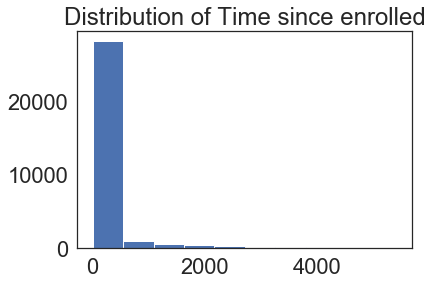

In [116]:
plt.hist(dataset.difference.dropna())
plt.title('Distribution of Time since enrolled')

Text(0.5, 1.0, 'Distribution of Time since enrolled')

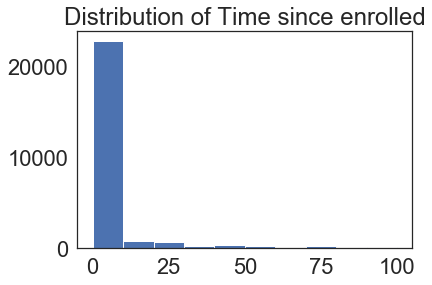

In [117]:
# from the above fig, people tend to enroll within 500 hrs after opening

# to see within 500hrs or its lesser than that will include a range to plot within 100 hrs

plt.hist(dataset.difference.dropna(), range=[0, 100])
plt.title('Distribution of Time since enrolled')

In [118]:
# from the above plot, its clear within 50hrs, lets consider two days ie, 48hrs after opening.
# consider that people those have enrolled after 48hrs as not enrolled and make it to 0
# Drop the columns which are not necessary

dataset.loc[dataset.difference > 48, 'enrolled'] = 0

dataset = dataset.drop(columns=['difference', 'enrolled_date', 'first_open'])





In [119]:
# how to get the entire row values of a perticular col.
dataset.screen_list.values



array(['idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login',
       'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2',
       'Splash,Cycle,Loan', ...,
       'joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home',
       'Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review,product_review',
       'product_review,ScanPreview,VerifyDateOfBirth,VerifyCountry,ProfileVerifySSN,ProfilePage,ProfileEducation,ProfileEducationMajor,Saving2Amount,Saving8,ProfileMaritalStatus,ProfileChildren,Saving2,Saving9,Saving7,Saving6,Saving5,Home,Loan2'],
      dtype=obj

In [120]:
dataset['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                        Splash,Cycle,Loan
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                   Cycle,Splash,Home,RewardsContainer
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

### Feature Engineering of the screen_list field

In [121]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [122]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [123]:
dataset['screen_list'] = dataset.screen_list.astype(str)+','

In [124]:
dataset.screen_list.values

array(['idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login,',
       'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2,',
       'Splash,Cycle,Loan,', ...,
       'joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home,',
       'Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review,product_review,',
       'product_review,ScanPreview,VerifyDateOfBirth,VerifyCountry,ProfileVerifySSN,ProfilePage,ProfileEducation,ProfileEducationMajor,Saving2Amount,Saving8,ProfileMaritalStatus,ProfileChildren,Saving2,Saving9,Saving7,Saving6,Saving5,Home,Loan2,'],
      dty

In [125]:
# will iterate over each screenlist in top screens , to make a col of its each name and to put 0 or 1 as its values
# if that screen list is found in our dataset..and replace if found in dataset

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',', '')#replace along with comma
    

In [126]:
dataset.screen_list.values

array(['joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,',
       'joinscreen,product_review,product_review2,ScanPreview,VerifyToken,',
       '', ...,
       'joinscreen,product_review,product_review2,ScanPreview,VerifyToken,Home,',
       'Home,product_review,product_review,product_review3,ScanPreview,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,product_review,product_review,',
       'product_review,ScanPreview,ProfileVerifySSN,ProfileChildren,Home,'],
      dtype=object)

In [127]:
# initially we had added extra commas after each screen name in our dataset, after the above for loop, to see if there
# are any leftovers of screen name that will be kept in "other" col and drop the screen_list col

dataset['others'] = dataset.screen_list.str.count(',')
dataset.drop(columns=['screen_list'], inplace=True)



In [128]:
# Funnel: funels are the grup of screens that belong to the same set, we have to do this to remove the correlation

# to do this, lets take a list of screens that belong together and save it in a col, with their sum

# with their sum meaning, 0's and 1's are put into to each screen name cols earlier, it will take sum of those 

saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
dataset['SavingsCount'] = dataset[saving_screens].sum(axis=1)
dataset.drop(columns=saving_screens, inplace=True)



In [129]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
dataset['Credit_count'] = dataset[credit_screens].sum(axis=1)
dataset.drop(columns=credit_screens, inplace=True)

In [130]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
dataset['cc_count'] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [131]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
dataset['loan_count'] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [132]:
dataset.shape

(50000, 50)

In [133]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'others',
       'SavingsCount', 'Credit_count', 'cc_count', 'loan_count'],
      dtype='object')

In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int64
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
liked                      50000 non-null int64
location                   50000 non-null int64
Institutions               50000 non-null int64
VerifyPhone                50000 non-null int64
BankVerification           50000 non-null int64
VerifyDateOfBirth          50000 non-null int64
ProfilePage                50000 non-null int64
VerifyCountry              50000 non-null int64
Cycle                      50000 non-null int64
idscreen                   50000 non-null int64
Splash                     

In [135]:
dataset.to_csv('new_appdata.csv', index=False)

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [137]:
data = pd.read_csv('new_appdata.csv')
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,Credit_count,cc_count,loan_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int64
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
liked                      50000 non-null int64
location                   50000 non-null int64
Institutions               50000 non-null int64
VerifyPhone                50000 non-null int64
BankVerification           50000 non-null int64
VerifyDateOfBirth          50000 non-null int64
ProfilePage                50000 non-null int64
VerifyCountry              50000 non-null int64
Cycle                      50000 non-null int64
idscreen                   50000 non-null int64
Splash                     

In [139]:
# data preprocessing

X = data.drop(columns=['enrolled'])
Y = data.enrolled

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)


(40000, 49)
(10000, 49)
(10000,)
(40000,)


In [142]:
# keeping the users in another var

train_user = X_train.user
X_train.drop(columns=['user'], inplace=True)

test_user = X_test.user
X_test.drop(columns=['user'], inplace=True)

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
# scaling the train and test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)


### Decision Tree Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6963
[[3515 1557]
 [1480 3448]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      5072
           1       0.69      0.70      0.69      4928

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [146]:
# using scaled data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(sc_X_train, y_train)
y_pred = model.predict(sc_X_test)

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6967
[[3520 1552]
 [1481 3447]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      5072
           1       0.69      0.70      0.69      4928

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



### KNN model

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6994


In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(sc_X_train, y_train)
y_pred = knn.predict(sc_X_test)

print(accuracy_score(y_test, y_pred))

0.7314


### Naive Bayes Classifier

In [151]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7114


In [152]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(sc_X_train, y_train)
y_pred = GNB.predict(sc_X_test)

print(accuracy_score(y_test, y_pred))

0.7114


### Random Forest Classifier


In [154]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print(accuracy_score(y_test, y_pred))

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7637


In [155]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(sc_X_train, y_train)
y_pred = RF.predict(sc_X_test)

print(accuracy_score(y_test, y_pred))

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7645


### Logistice Regression


In [157]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print(accuracy_score(y_test, y_pred))

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7682


In [158]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(sc_X_train, y_train)
y_pred = LR.predict(sc_X_test)

print(accuracy_score(y_test, y_pred))

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.768


### SVC

In [159]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred))

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7616


In [160]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(sc_X_train, y_train)
y_pred = svc.predict(sc_X_test)

print(accuracy_score(y_test, y_pred))

/Users/sushmaprakash/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.779


In [161]:
# SVM is performing well